<a href="https://colab.research.google.com/github/Shivani11032006/Assignment/blob/main/day26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

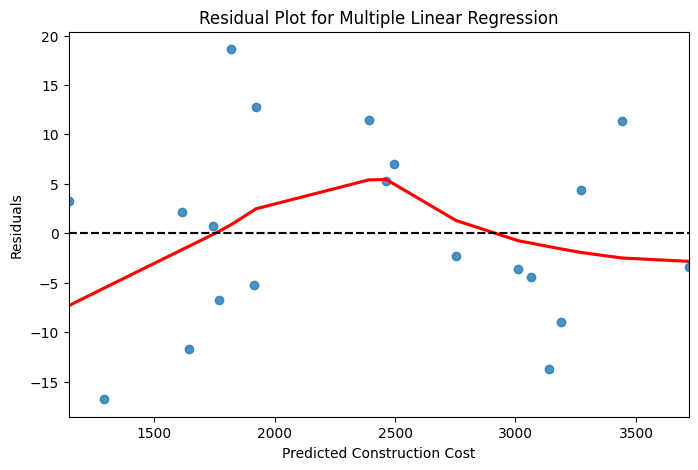

(['Building_Height',
  'Material_Quality_Index',
  'Labor_Cost',
  'Concrete_Strength',
  'Foundation_Depth'],
 0.9998023074199777,
 0.9997317029271126,
 (0, 8),
 Empty DataFrame
 Columns: [Building_Height, Material_Quality_Index, Labor_Cost, Concrete_Strength, Foundation_Depth, Weather_Index, Construction_Cost, Z_Score]
 Index: [])

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Load the dataset
file_path = "/content/Civil_Engineering_Regression_Dataset.csv"
df = pd.read_csv(file_path)

# Drop Project_ID if it exists (not useful for regression)
if "Project_ID" in df.columns:
    df.drop(columns=["Project_ID"], inplace=True)

# Define independent (X) and dependent (y) variables for multiple regression
X_multi = df[["Building_Height", "Material_Quality_Index", "Labor_Cost", "Concrete_Strength", "Foundation_Depth"]]
y_multi = df["Construction_Cost"]

# Split the data into training and testing sets (80% train, 20% test)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Feature Selection using Lasso Regression
lasso = Lasso(alpha=0.1)  # Regularization strength (can be tuned)
lasso.fit(X_train_multi, y_train_multi)

# Get selected features (non-zero coefficients)
selected_features = [feature for feature, coef in zip(X_multi.columns, lasso.coef_) if coef != 0]

# Train multiple linear regression model with selected features
multi_model = LinearRegression()
multi_model.fit(X_train_multi[selected_features], y_train_multi)

# Predict on test data
y_test_pred = multi_model.predict(X_test_multi[selected_features])
residuals = y_test_multi - y_test_pred

# Residual Analysis Plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_test_pred, y=residuals, lowess=True, line_kws={"color": "red"})
plt.axhline(0, linestyle="--", color="black")
plt.xlabel("Predicted Construction Cost")
plt.ylabel("Residuals")
plt.title("Residual Plot for Multiple Linear Regression")
plt.show()

# Outlier Detection using Z-scores
df_zscores = df.copy()
df_zscores["Z_Score"] = zscore(df["Construction_Cost"])
outliers = df_zscores[df_zscores["Z_Score"].abs() > 3]  # Outliers beyond 3 standard deviations

# Compute R-squared and Adjusted R-squared for optimized model
r2_multiple = r2_score(y_test_multi, y_test_pred)
n = X_test_multi[selected_features].shape[0]  # Number of observations
p = X_test_multi[selected_features].shape[1]  # Number of predictors
adjusted_r2_multiple = 1 - ((1 - r2_multiple) * (n - 1) / (n - p - 1))

# Display results
selected_features, r2_multiple, adjusted_r2_multiple, outliers.shape, outliers.head()
